In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']),ignore_index=True)
all_data.shape

(2919, 79)

In [8]:
#find the columns which are missing value a lot and then drop them from all_data
null_table = all_data.isnull().sum().sort_values(ascending=False)/2919
featurs_null= null_table.index[:5]

In [9]:
all_data.drop(featurs_null,axis=1,inplace=True)

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 74 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 no

In [11]:
all_data.drop(313,inplace=True)

C:\Users\Hongmei\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


array([ 122.93224732])

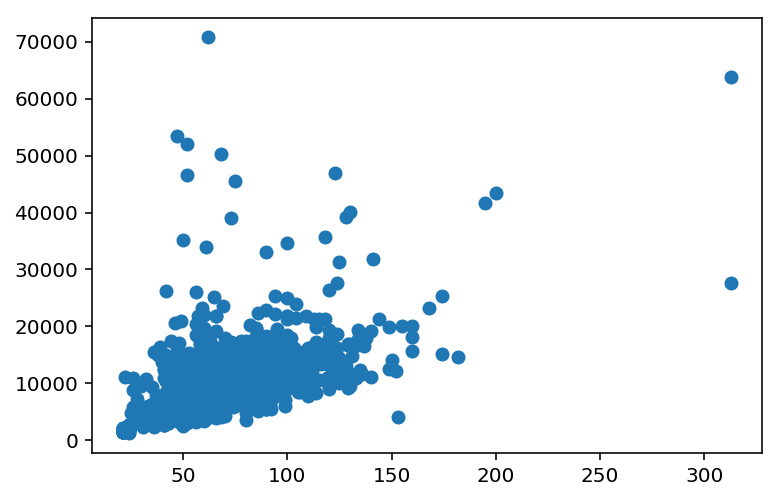

In [12]:
#lotfrontage has a lot of missing data.  will try to find a relationship between lotfrontage with other variable and try to fill 
plt.scatter(all_data['LotFrontage'],all_data['LotArea'])
#all_data[all_data["LotArea"]>200000] is removed by previous step and it is clearly an outlier
df_fit = all_data[["LotFrontage",'LotArea']].dropna()
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
df_fit
x=df_fit.LotFrontage.reshape(-1, 1)
y=df_fit.LotArea
LR.fit(x,y)
LR.coef_

In [13]:
#using above coef between lotgrontage and lotarea to fill the missing value
def filldata(x):
    lotfront = x[0]
    lotarea = x[1]
    if x[0]>0 or x[0]==0:
        return x[0]
    else:
        return x[1]/122.9
#all_data["LotFrontage"]=
all_data['LotFrontage']=all_data[["LotFrontage","LotArea"]].apply(filldata,axis=1)

In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 2918
Data columns (total 74 columns):
MSSubClass       2918 non-null int64
MSZoning         2914 non-null object
LotFrontage      2918 non-null float64
LotArea          2918 non-null int64
Street           2918 non-null object
LotShape         2918 non-null object
LandContour      2918 non-null object
Utilities        2916 non-null object
LotConfig        2918 non-null object
LandSlope        2918 non-null object
Neighborhood     2918 non-null object
Condition1       2918 non-null object
Condition2       2918 non-null object
BldgType         2918 non-null object
HouseStyle       2918 non-null object
OverallQual      2918 non-null int64
OverallCond      2918 non-null int64
YearBuilt        2918 non-null int64
YearRemodAdd     2918 non-null int64
RoofStyle        2918 non-null object
RoofMatl         2918 non-null object
Exterior1st      2917 non-null object
Exterior2nd      2917 non-null object
MasVnrType       2894 no

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D0187B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D25CCC0>]], dtype=object)

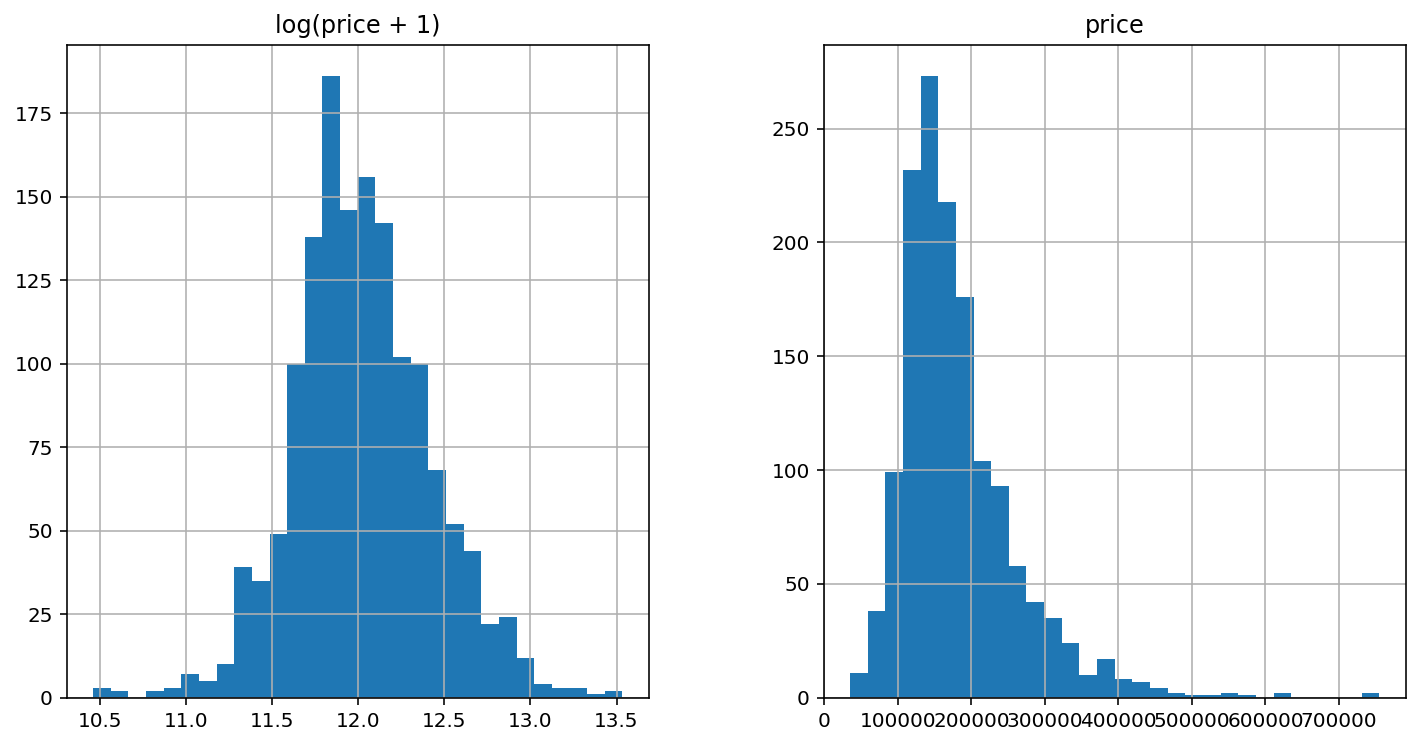

In [15]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist(bins=30)

In [16]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [17]:
all_data = pd.get_dummies(all_data,drop_first=True)
# drop_first is to only get k-1 dummies from k category variable

In [18]:
all_data = all_data.fillna(all_data.mean())


In [34]:
X_train = all_data[:train.shape[0]-1]
X_test = all_data[train.shape[0]-1:]
y = train.SalePrice.drop(313)

In [35]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [36]:
#ridge model
model_ridge = Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None,normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
param_grid = {'alpha': [0.01,0.03,0.1,0.3,1,3,10,30]} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model_ridge,param_grid,refit=True,verbose=3)


In [38]:
grid.fit(X_train,y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] alpha=0.01 ......................................................
[CV] ................. alpha=0.01, score=0.846633609756, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ................. alpha=0.01, score=0.881297154959, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ................. alpha=0.01, score=0.863534852815, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] ................. alpha=0.03, score=0.866211128837, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] .................. alpha=0.03, score=0.88036709254, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] ................. alpha=0.03, score=0.864445889929, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... alpha=1, score=0.884612108057, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .................... alpha=1, score=0.877218136613, total=   0.0s
[CV] alpha=3 .........................................................
[CV] ..................... alpha=3, score=0.91866614456, total=   0.0s
[CV] alpha=3 .........................................................
[CV] .................... alpha=3, score=0.885915565466, total=   0.0s
[CV] alpha=3 .........................................................
[CV] .................... alpha=3, score=0.879919967314, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ................... alpha=10, score=0.917349055275, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ................... alpha=10, score=0.884776444931, total=   0.0s
[CV] alpha=10 ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [39]:
grid.best_estimator_

Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
model_ridge.fit(X_train,y)
predict = model_ridge.predict(X_test)

In [41]:
solution = np.expm1(predict)
solution = pd.Series(solution)
solution.to_csv("submission.csv")

In [42]:
#Lasso model
from sklearn.linear_model import Lasso
model_lasso=Lasso(alpha=0.0003, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
param_grid = {'alpha': [0.0001,0.0003,0.001,0.003,0.01,0.03,0.1]} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model_lasso,param_grid,refit=True,verbose=3)

In [44]:
grid.fit(X_train,y)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] alpha=0.0001 ....................................................
[CV] ............... alpha=0.0001, score=0.899993902195, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ............... alpha=0.0001, score=0.886227966929, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ................ alpha=0.0001, score=0.87779003434, total=   0.0s
[CV] alpha=0.0003 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............... alpha=0.0003, score=0.924349686061, total=   0.0s
[CV] alpha=0.0003 ....................................................
[CV] ................ alpha=0.0003, score=0.88266058694, total=   0.0s
[CV] alpha=0.0003 ....................................................
[CV] ............... alpha=0.0003, score=0.883234226579, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ................ alpha=0.001, score=0.919523480166, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ................ alpha=0.001, score=0.882622366256, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ................ alpha=0.001, score=0.879171236815, total=   0.0s
[CV] alpha=0.003 .....................................................
[CV] ................ alpha=0.003, score=0.902217756426, total=   0.0s
[CV] alpha=0.003 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=0.0003, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [45]:
grid.best_estimator_

Lasso(alpha=0.0003, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
model_lasso.fit(X_train,y)

Lasso(alpha=0.0003, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
prediction_lasso = model_lasso.predict(X_test)

In [48]:
solution_lasso = pd.Series(np.expm1(prediction_lasso))
solution_lasso.to_csv("submission_lass.csv")

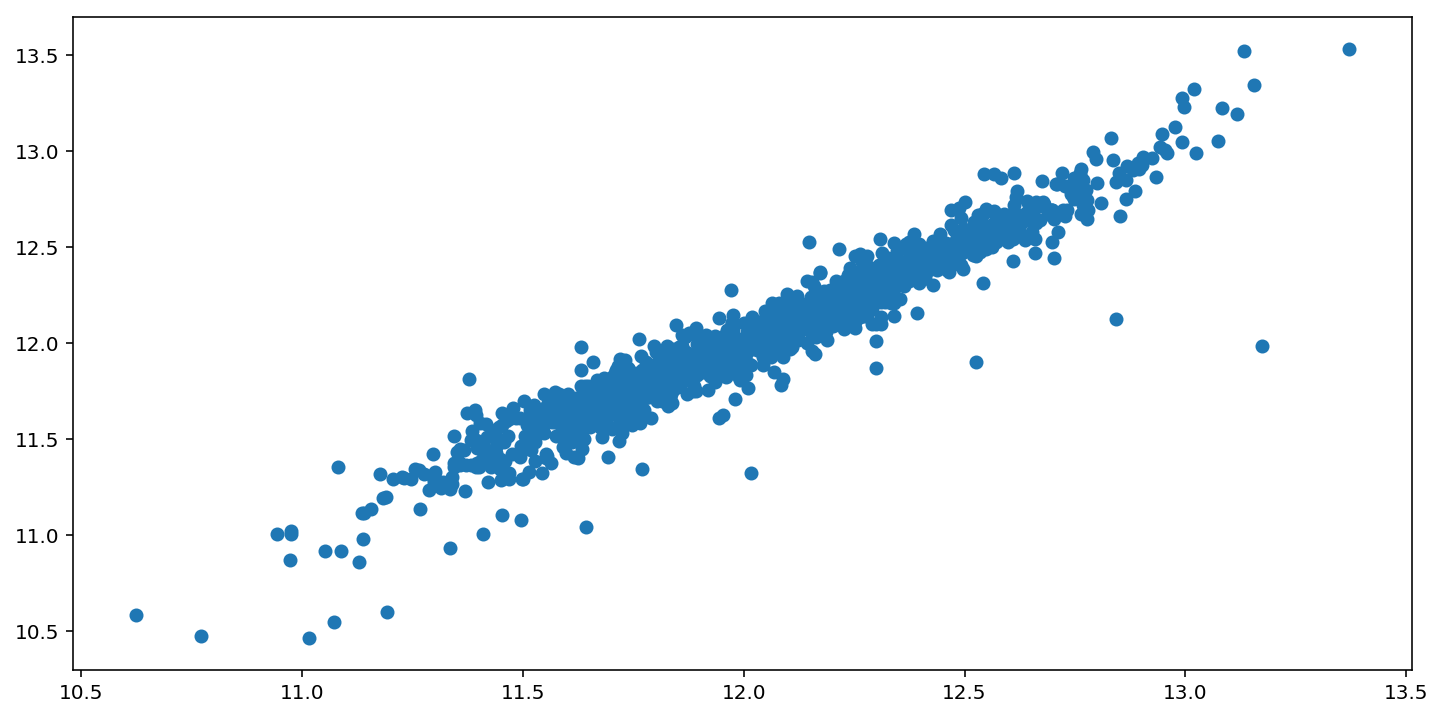

In [49]:
plt.scatter(model_lasso.predict(X_train),y)

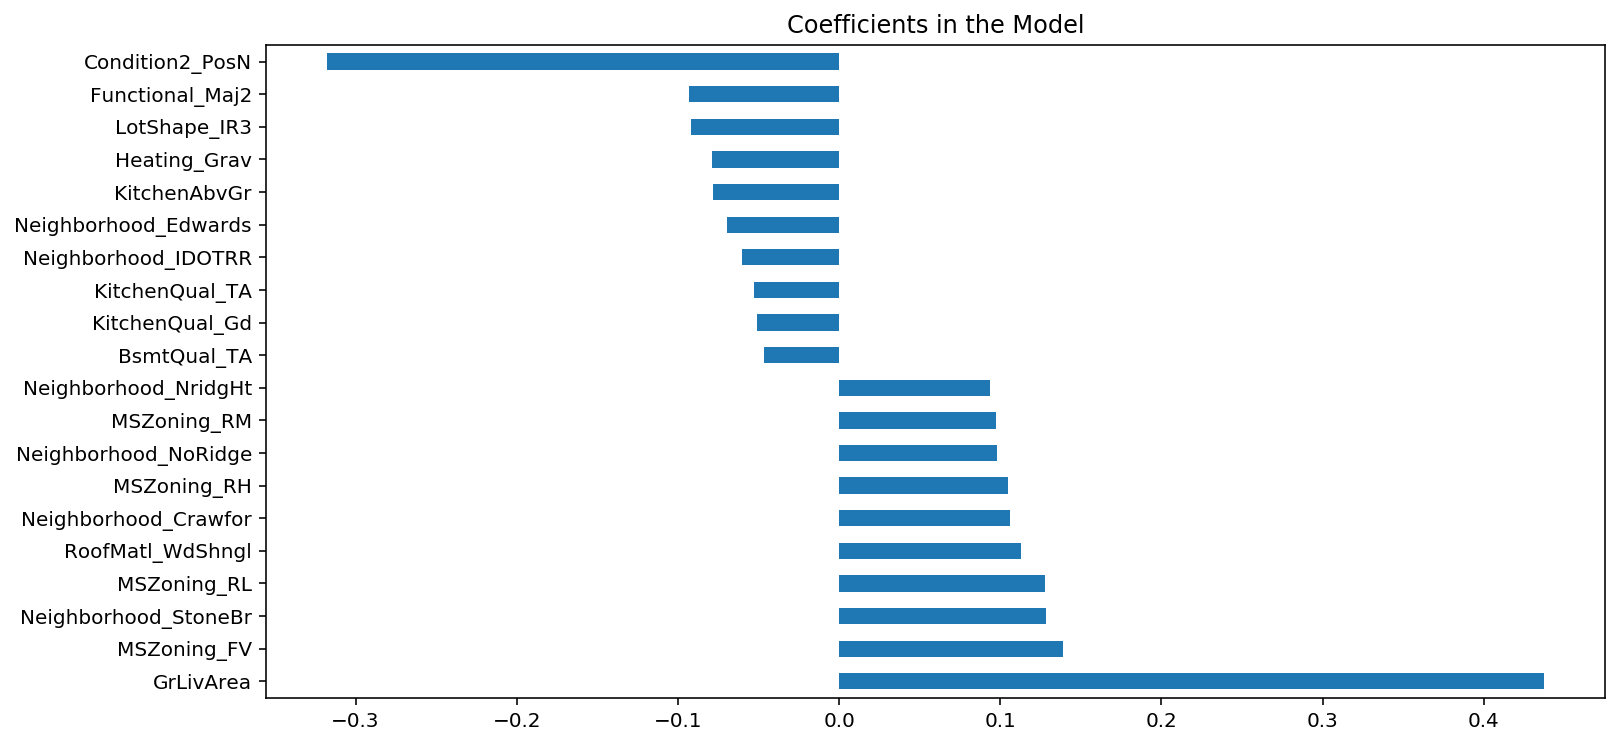

In [50]:
coef = pd.Series(model_lasso.coef_,X_train.columns).sort_values(ascending=False)
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

In [ ]:
# stack lasso and redige model as half and half
stack_cal = 0.5*np.expm1(prediction_lasso)+0.5*solution
pd.Series(stack_cal).to_csv("stack_ridge_lasso.csv")
